

  		  	   		  		 		  		  		    	 		 		   		 		  <br>
 		  	   		  		 		  		  		    	 		 		   		 		  

In [ ]:
# if __name__ == "__main__":  		  	   		  		 		  		  		    	 		 		   		 		  
#     if len(sys.argv) != 2:  		  	   		  		 		  		  		    	 		 		   		 		  
#         print("Usage: python testlearner.py <filename>")  		  	   		  		 		  		  		    	 		 		   		 		  
#         sys.exit(1)  		  	   		  		 		  		  		    	 		 		   		 		  
#     inf = open(sys.argv[1])  		  	   		  		 		  		  		    	 		 		   		 		  


In [ ]:
#     # create a lrl_learner and train it  		  	   		  		 		  		  		    	 		 		   		 		  
#     lrl_learner = lrl.LinRegLearner(verbose=True)  # create a LinRegLearner  		  	   		  		 		  		  		    	 		 		   		 		  
#     lrl_learner.add_evidence(train_x, train_y)  # train it  		  	   		  		 		  		  		    	 		 		   		 		  
#     print(lrl_learner.author())  		  	   		  		 		  		  		    	 		 		   		 		  
  		  	   		  		 		  		  		    	 		 		   		 		  
#     # evaluate in sample  		  	   		  		 		  		  		    	 		 		   		 		  
#     pred_y = lrl_learner.query(train_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
#     rmse = math.sqrt(((train_y - pred_y) ** 2).sum() / train_y.shape[0])  		  	   		  		 		  		  		    	 		 		   		 		  
#     print()  		  	   		  		 		  		  		    	 		 		   		 		  
#     print("In sample results")  		  	   		  		 		  		  		    	 		 		   		 		  
#     print(f"RMSE: {rmse}")  		  	   		  		 		  		  		    	 		 		   		 		  
#     c = np.corrcoef(pred_y, y=train_y)  		  	   		  		 		  		  		    	 		 		   		 		  
#     print(f"corr: {c[0,1]}")  		  	   		  		 		  		  		    	 		 		   		 		  
  		  	   		  		 		  		  		    	 		 		   		 		  
#     # evaluate out of sample  		  	   		  		 		  		  		    	 		 		   		 		  
#     pred_y = lrl_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
#     rmse = math.sqrt(((test_y - pred_y) ** 2).sum() / test_y.shape[0])  		  	   		  		 		  		  		    	 		 		   		 		  
#     print()  		  	   		  		 		  		  		    	 		 		   		 		  
#     print("Out of sample results")  		  	   		  		 		  		  		    	 		 		   		 		  
#     print(f"RMSE: {rmse}")  		  	   		  		 		  		  		    	 		 		   		 		  
#     c = np.corrcoef(pred_y, y=test_y)  		  	   		  		 		  		  		    	 		 		   		 		  
#     print(f"corr: {c[0,1]}")  	
    
    
    

In [864]:
import math  		  	   		  		 		  		  		    	 		 		   		 		  
import sys  		  	   		  		 		  		  		    	 		 		   		 		  
  		  	   		  		 		  		  		    	 		 		   		 		  
import numpy as np  		  	   		  		 		  		  		    	 		 		   		 		  
  		  	   		  		 		  		  		    	 		 		   		 		  
import matplotlib.pyplot as plt
import LinRegLearner as lrl  	
import DTLearner as dt
import RTLearner as rt
import BagLearner as bl
import InsaneLearner as it 

In [865]:
#np.random.seed(903566160)

TypeError: 'int' object is not callable

In [897]:
with open('Istanbul.csv') as f:
    lines = f.readlines()
    del lines[0]
    data = np.array(  		  	   		  		 		  		  		    	 		 		   		 		  
        [list(map(float, s.strip().split(",")[1:])) for s in lines]  		  	   		  		 		  		  		    	 		 		   		 		  
    )  		  	   		  		 		  		  		    	 		 		   		 		  
    
    new_rows = np.arange(data.shape[0])
    np.random.shuffle(new_rows)
    new_data = data[new_rows]
    
    # compute how much of the data is training and testing  		  	   		  		 		  		  		    	 		 		   		 		  
    train_rows = int(0.6 * new_data.shape[0])  		  	   		  		 		  		  		    	 		 		   		 		  
    test_rows = new_data.shape[0] - train_rows
          
    # separate out training and testing data  		  	   		  		 		  		  		    	 		 		   		 		  
    train_x = new_data[:train_rows, 0:-1]  		  	   		  		 		  		  		    	 		 		   		 		  
    train_y = new_data[:train_rows, -1]  		  	   		  		 		  		  		    	 		 		   		 		  
    test_x = new_data[train_rows:, 0:-1]  		  	   		  		 		  		  		    	 		 		   		 		  
    test_y = new_data[train_rows:, -1]  		  
    
    ### Experiment 1
    #create dt learner
    def experiment_1(learner=dt.DTLearner, leaf_size = np.arange(1,51)):
        in_rmse = []
        out_rmse = []
        for n in leaf_size:
            dt_learner = learner(leaf_size=n, verbose=False) 	  	   		  		 		  		  		    	 		 		   		 		  
            dt_learner.add_evidence(train_x, train_y)  

            # evaluate in sample  		  	   		  		 		  		  		    	 		 		   		 		  
            in_pred_y = dt_learner.query(train_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
            in_rmse.append(math.sqrt(((train_y - in_pred_y) ** 2).sum() / train_y.shape[0]))  		  	   		  		 		  		  		    	 		 		   		 		  
            in_c = np.corrcoef(in_pred_y, y=train_y)  		  	   		  		 		  		  		    	 		 		   		 		  

            # evaluate out of sample  		  	   		  		 		  		  		    	 		 		   		 		  
            out_pred_y = dt_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
            out_rmse.append(math.sqrt(((test_y - out_pred_y) ** 2).sum() / test_y.shape[0]))
            out_c = np.corrcoef(out_pred_y, y=test_y)

        print(in_rmse)
        print(out_rmse)
        #graph/chart
        plt.plot(leaf_size, in_rmse, label="In Sample RMSE")
        plt.plot(leaf_size, out_rmse, label="Out of Sample RMSE")
        plt.xlabel("Leaf Size")
        plt.ylabel("RMSE")
        plt.title("DTLearner: Leaf Size vs RMSE")
        plt.grid()
        plt.margins(x=0)
        plt.legend()
        plt.savefig("Experiment_1.png")
        plt.clf()


    ### Experiment 3

[0.0007376055830391778, 0.002185196845573659, 0.0030299558938372733, 0.003061536325238538, 0.004234148883522539, 0.004339909738519051, 0.0043604391392304785, 0.0043604391392304785, 0.004409042999633735, 0.004800669909672887, 0.0049058686937589625, 0.0049058686937589625, 0.0049058686937589625, 0.0049058686937589625, 0.0049058686937589625, 0.0049058686937589625, 0.0049058686937589625, 0.004952053918978005, 0.00496884340689164, 0.005913605976817666, 0.006187363545590929, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006234868737496068, 0.006255973448807987, 0.006805981630364736, 0.007141710685941834, 0.007141710685941834, 0.007141710685941834, 0.007141710685941834, 0.007141710685941834,

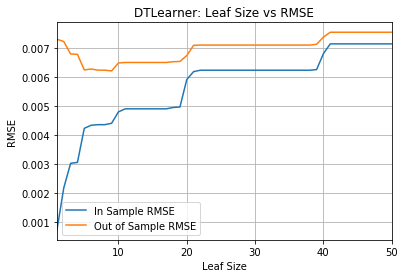

In [898]:
experiment_1()

In [932]:
with open('Istanbul.csv') as f:
    lines = f.readlines()
    del lines[0]
    data = np.array(  		  	   		  		 		  		  		    	 		 		   		 		  
        [list(map(float, s.strip().split(",")[1:])) for s in lines]  		  	   		  		 		  		  		    	 		 		   		 		  
    )  		  	   		  		 		  		  		    	 		 		   		 		  
    
    
    new_rows = np.arange(data.shape[0])
    np.random.shuffle(new_rows)
    new_data = data[new_rows]
    
    # compute how much of the data is training and testing  		  	   		  		 		  		  		    	 		 		   		 		  
    train_rows = int(0.6 * new_data.shape[0])  		  	   		  		 		  		  		    	 		 		   		 		  
    test_rows = new_data.shape[0] - train_rows
          
    # separate out training and testing data  		  	   		  		 		  		  		    	 		 		   		 		  
    train_x = new_data[:train_rows, 0:-1]  		  	   		  		 		  		  		    	 		 		   		 		  
    train_y = new_data[:train_rows, -1]  		  	   		  		 		  		  		    	 		 		   		 		  
    test_x = new_data[train_rows:, 0:-1]  		  	   		  		 		  		  		    	 		 		   		 		  
    test_y = new_data[train_rows:, -1]  
    
    def experiment_3(learner_1=dt.DTLearner, learner_2=rt.RTLearner, leaf_size = np.arange(1,51)):
        rt_mape = []
        dt_mape = []
        for n in leaf_size:
            dt_learner = learner_1(leaf_size=n, verbose=False) 	  	   		  		 		  		  		    	 		 		   		 		  
            dt_learner.add_evidence(train_x, train_y)
            
            rt_learner = learner_2(leaf_size=n, verbose=False) 	  	   		  		 		  		  		    	 		 		   		 		  
            rt_learner.add_evidence(train_x, train_y)

            # evaluate DTLearner  		  	   		  		 		  		  		    	 		 		   		 		  
            dt_pred_y = dt_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
            dt_mape.append(np.mean(abs((test_y - dt_pred_y).sum() / test_y.shape[0]))*100)  		  		 		  		  		    	 		 		   		 		  

            # evaluate RTlearner		  	   		  		 		  		  		    	 		 		   		 		  
            rt_pred_y = rt_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
            rt_mape.append(np.mean(abs((test_y - rt_pred_y).sum() / test_y.shape[0]))*100)
        
        
        #graph/chart
        plt.plot(leaf_size, dt_mape, label="DTLearner MAPE")
        plt.plot(leaf_size, rt_mape, label="RTLearner MAPE")
        plt.xlabel("Leaf Size")
        plt.ylabel("MAPE")
        plt.title("Comparing DT vs RT with MAPE")
        plt.grid()
        plt.margins(x=0)
        plt.legend()
        plt.show()
#         plt.savefig("Experiment_3.png")
#         plt.clf()

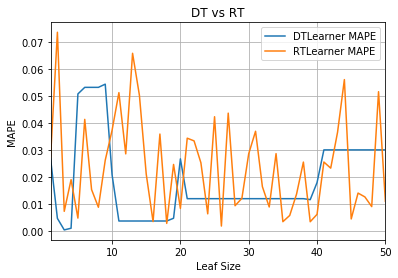

In [933]:
experiment_3()

in_mape: [0.0, 0.0, 5.404122978120894e-18, 1.0808245956241788e-18, 9.72742136061761e-18, 4.323298382496715e-18, 4.323298382496715e-18, 2.1616491912483576e-18, 2.1616491912483577e-17, 1.729319352998686e-17, 8.64659676499343e-18, 1.0808245956241788e-17, 1.2969895147490145e-17, 2.810143948622865e-17, 3.458638705997372e-17, 1.945484272123522e-17, 5.404122978120894e-18, 4.323298382496715e-18, 3.782886084684626e-18, 1.0808245956241788e-18, 1.2969895147490145e-17, 2.593979029498029e-17, 2.593979029498029e-17, 6.484947573745073e-17, 2.3778141103731932e-17, 2.1616491912483577e-17, 3.0263088677477006e-17, 4.3232983824967154e-17, 3.458638705997372e-17, 2.2697316508107754e-17, 4.3232983824967154e-17, 1.945484272123522e-17, 8.64659676499343e-18, 2.1616491912483577e-17, 2.918226408185283e-17, 6.4849475737450724e-18, 6.4849475737450724e-18, 3.458638705997372e-17, 5.62028789724573e-17, 8.64659676499343e-18, 2.1616491912483577e-17, 4.10713346337188e-17, 3.0263088677477006e-17, 3.458638705997372e-17, 8.

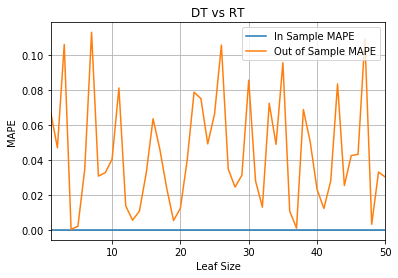

In [925]:
experiment_3(learner=rt.RTLearner)

In [ ]:
    mean_actual = np.mean(test_y)
    tss = np.sum((test_y - mean_actual) ** 2)
    rss = np.sum((test_y - out_pred_y) ** 2)
    r_squared = 1 - (rss / tss)

In [ ]:
    dt_pred_y = dt_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		 
    dt_r2.append(1-(((test_y - np.mean(test_y))**2).sum() / ((test_y - rt_pred_y)**2).sum())) 		  		 		  		  		    	 		 		   		 		  

    # evaluate RTlearner		  	   		  		 		  		  		    	 		 		   		 		  
    rt_pred_y = rt_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
    rt_r2.append(1-(((test_y - np.mean(test_y))**2).sum() / ((test_y - rt_pred_y)**2).sum()))

In [940]:
with open('Istanbul.csv') as f:
    lines = f.readlines()
    del lines[0]
    data = np.array(  		  	   		  		 		  		  		    	 		 		   		 		  
        [list(map(float, s.strip().split(",")[1:])) for s in lines]  		  	   		  		 		  		  		    	 		 		   		 		  
    )  		  	   		  		 		  		  		    	 		 		   		 		  
    
    
    new_rows = np.arange(data.shape[0])
    np.random.shuffle(new_rows)
    new_data = data[new_rows]
    
    # compute how much of the data is training and testing  		  	   		  		 		  		  		    	 		 		   		 		  
    train_rows = int(0.6 * new_data.shape[0])  		  	   		  		 		  		  		    	 		 		   		 		  
    test_rows = new_data.shape[0] - train_rows
          
    # separate out training and testing data  		  	   		  		 		  		  		    	 		 		   		 		  
    train_x = new_data[:train_rows, 0:-1]  		  	   		  		 		  		  		    	 		 		   		 		  
    train_y = new_data[:train_rows, -1]  		  	   		  		 		  		  		    	 		 		   		 		  
    test_x = new_data[train_rows:, 0:-1]  		  	   		  		 		  		  		    	 		 		   		 		  
    test_y = new_data[train_rows:, -1]  
    
    def experiment_3_2(learner_1=dt.DTLearner, learner_2=rt.RTLearner, leaf_size = np.arange(1,51)):
        rt_r2 = []
        dt_r2 = []
        for n in leaf_size:
            dt_learner = learner_1(leaf_size=n, verbose=False) 	  	   		  		 		  		  		    	 		 		   		 		  
            dt_learner.add_evidence(train_x, train_y)
            
            rt_learner = learner_2(leaf_size=n, verbose=False) 	  	   		  		 		  		  		    	 		 		   		 		  
            rt_learner.add_evidence(train_x, train_y)

            # evaluate DTLearner  		  	   		  		 		  		  		    	 		 		   		 		  
            dt_pred_y = dt_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		 
            dt_r2.append(1-(((test_y - dt_pred_y)**2).sum())/((test_y - np.mean(test_y))**2).sum()) 		  		 		  		  		    	 		 		   		 		  

            # evaluate RTlearner		  	   		  		 		  		  		    	 		 		   		 		  
            rt_pred_y = rt_learner.query(test_x)  # get the predictions  		  	   		  		 		  		  		    	 		 		   		 		  
            rt_r2.append(1-(((test_y - rt_pred_y)**2).sum())/((test_y - np.mean(test_y))**2).sum())
    
        
        #graph/chart
        plt.plot(leaf_size, dt_r2, label="DTLearner R^2")
        plt.plot(leaf_size, rt_r2, label="RTLearner R^2")
        plt.xlabel("Leaf Size")
        plt.ylabel("R-Squared")
        plt.title("DT vs RT with Coefficient of Determination (R-Squared)")
        plt.grid()
        plt.margins(x=0)
        plt.legend()
        plt.show()

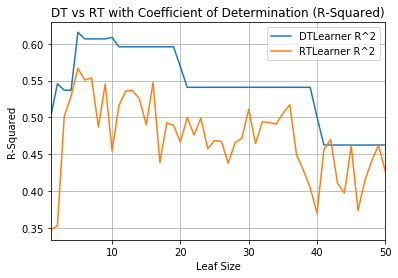

In [941]:
experiment_3_2()